In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import matplotlib.cm as cmx

In [2]:
summaryBatch = pd.read_json("./summaryBatch.json")

In [3]:
batch = pd.read_json("./batch.json")

In [4]:
summaryBatch

,k,s1. agg m,s1. max m,s1. peak,s2. agg m,s2. max m,s2. peak,total m
0,1,1.180617,1.180617,67,1.039648,1.039648,59,1.039648
1,2,1.103015,1.206030,60,1.052764,1.105528,55,1.092511
2,3,1.085954,1.257862,50,1.002096,1.006289,40,1.004405
3,4,1.163871,1.397590,29,1.163871,1.397590,29,1.180617
4,5,1.166185,1.397590,29,1.166185,1.397590,29,1.180617
5,6,1.324510,1.866667,28,1.324510,1.866667,28,1.180617


In [5]:
with open('summaryBatch.tex','w') as tf:
    tf.write(summaryBatch.to_latex())

In [6]:
norm = colors.Normalize(vmin=0, vmax=1000)

#colormap possible values = viridis, jet, spectral
rgba_color = cm.gnuplot(norm(400),bytes=True)
rgba_color

(161, 16, 149, 255)

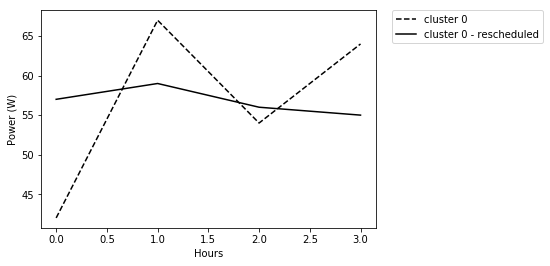

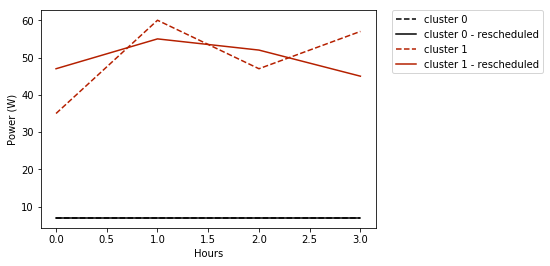

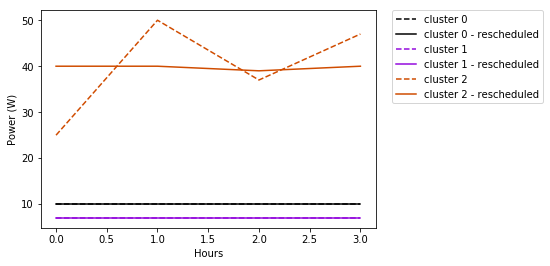

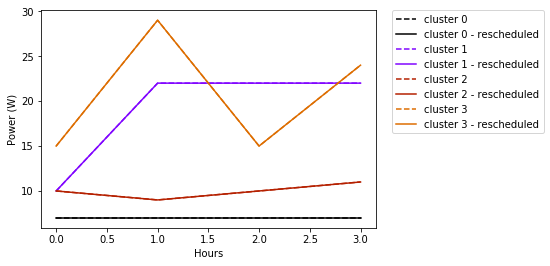

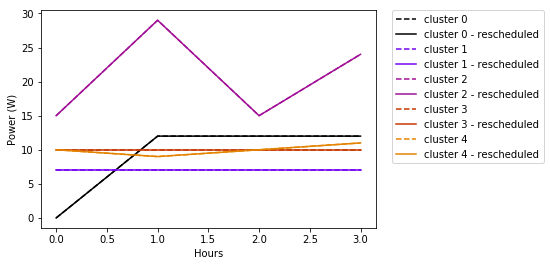

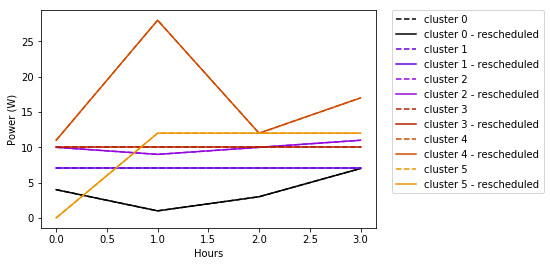

In [7]:
for runIdx in range(0, len(batch)):
    fig, ax = plt.subplots()
    clusters_step1 = batch.iloc[runIdx]["steps"][0]["clusters"]
    clusters_step2 = batch.iloc[runIdx]["steps"][1]["clusters"]
    norm = colors.Normalize(vmin=0, vmax=len(clusters_step1))
    for cIdx in range(0, len(clusters_step1)):
        rgba_color = cm.gnuplot(norm(cIdx))
        ax.plot(clusters_step1[cIdx]["syntheticCenter"], "--", color=rgba_color, label="cluster %s" % cIdx)
        ax.plot(clusters_step2[cIdx]["syntheticCenter"], color=rgba_color, label="cluster %s - rescheduled" % cIdx)
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    ax.set(xlabel='Hours', ylabel='Power (W)',title='')
    plt.show()